# OAK - log generation
 - doc: https://github.com/openaiknowledge/pr3
 

# Import Libraries

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow import keras
import tensorflow.keras.utils 
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy as np

from google.colab import drive

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds

import pathlib

# Load Dataset

In [28]:
BASE_FOLDER = '/content/drive/My Drive/openaiknowledge/pr3/'
DATA = BASE_FOLDER + 'data/1/' #version 1
IMAGES = DATA + "images/"
MODEL = BASE_FOLDER + "model/1/"

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_image_pil(image_url):
  image = PIL.Image.open(image_url)
  plot_image(image)

def show_image(image_url):
  image = tf.keras.preprocessing.image.load_img(image_url)
  plot_image(image)

## Preprocessing data


In [33]:
batch_size = 32
img_height = 180 #todo review
img_width = img_height

In [34]:
train_logos_path = IMAGES + "logos"
train_ds_logos = tf.keras.preprocessing.image_dataset_from_directory(
  train_logos_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  smart_resize="True")
print(train_ds_logos.class_names)

Found 77 files belonging to 1 classes.
Using 62 files for training.
['sensodyne']


In [31]:
train_2011_path = IMAGES + "2001" #'/content/drive/My Drive/openaiknowledge/pr3/data/1/images/2001'
train_ds_2001 = tf.keras.preprocessing.image_dataset_from_directory(
  train_2011_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  smart_resize="True")
print(train_ds_2001.class_names)

Found 33 files belonging to 1 classes.
Using 27 files for training.
['2001']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

### Visualize the data

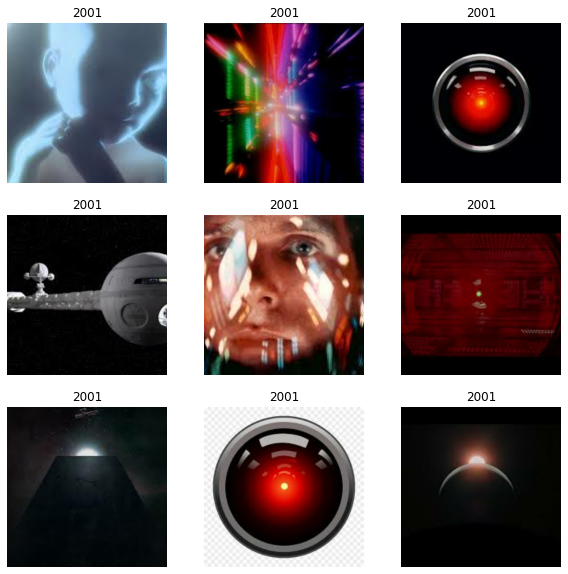

In [39]:
import matplotlib.pyplot as plt

def show_ds_example(ds):
  plt.figure(figsize=(10, 10))
  for images, labels in ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(ds.class_names[labels[i]])
      plt.axis("off")

show_ds_example(train_ds_2001)